# Pd removal paper
 
RF model notebook 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1. Importing data

In [2]:
# !dir
data_helper = pd.read_csv('Pd_removal_data_mansucript.csv')
data_helper.head()

,Compound,Temperature,pH,Solvent 1,Base,Chelator,Chelator_amount,Pd_removal_efficiency
0,Palladium(II) acetate,20,8.84,2-methyltetrahydrofuran,Potassium phosphate tribasic,N-acetyl cysteine,5,0.983028
1,Palladium(II) acetate,20,10.33,2-methyltetrahydrofuran,Potassium bicarbonate,N-acetyl cysteine,5,0.983028
2,Palladium(II) acetate,20,10.06,2-methyltetrahydrofuran,Potassium carbonate,N-acetyl cysteine,5,0.983028
3,Palladium(II) acetate,20,12.19,2-methyltetrahydrofuran,Potassium hydroxide,N-acetyl cysteine,5,0.983028
4,Palladium(II) acetate,20,8.84,Toluene,Potassium phosphate tribasic,N-acetyl cysteine,5,0.982935


In [3]:
data_helper.shape

(300, 8)

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

X_train  = data_helper.drop(columns = ['Pd_removal_efficiency'])
y_train  = data_helper.iloc[:,-1]
features_to_encode = X_train.columns[X_train.dtypes==object].tolist()  
column_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough")

def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_encoded = encode_and_bind(data_helper, features_to_encode)
X_encoded.head()

,Compound_Bis[tris(2-methylphenyl)phosphine]palladium(0),Compound_Palladium(II) acetate,Solvent 1_2-methyltetrahydrofuran,Solvent 1_Cyclopentyl methyl ether,Solvent 1_Ethyl acetate,Solvent 1_Methyl isobutyl ketone,Solvent 1_Toluene,Base_Potassium bicarbonate,Base_Potassium carbonate,Base_Potassium hydroxide,Base_Potassium phosphate tribasic,Chelator_N-acetyl cysteine,Chelator_Sodium diethyldithiocarbamate,Chelator_Thiosalicylic Acid,Temperature,pH,Chelator_amount,Pd_removal_efficiency
0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,20,8.84,5,0.983028
1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,20,10.33,5,0.983028
2,0,1,1,0,0,0,0,0,1,0,0,1,0,0,20,10.06,5,0.983028
3,0,1,1,0,0,0,0,0,0,1,0,1,0,0,20,12.19,5,0.983028
4,0,1,0,0,0,0,1,0,0,0,1,1,0,0,20,8.84,5,0.982935


2. Use the random grid to optimize the hyperparameters for RFR model

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


test_size = 0.15
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded.drop(columns=['Pd_removal_efficiency']),
                                                X_encoded['Pd_removal_efficiency'],test_size=test_size,
                                                random_state=42)

param_distribution = {'n_estimators': [100, 200, 300, 400, 500],
                      'max_features': ['sqrt', 'log2', 0.5],
                      'max_depth': [None, 5, 10, 15, 20],
                      'min_samples_split': [2, 3, 5, 7, 10],
                      'min_samples_leaf': [1, 2, 3, 4, 5],
                      'bootstrap': [True, False]}

rf = RandomForestRegressor(random_state = 1)
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distribution,
                              n_iter = 100,cv = 3,random_state=1)
rf_random_search.fit(Xtrain, ytrain);


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded.drop(columns=['Pd_removal_efficiency']),
                                                X_encoded['Pd_removal_efficiency'],test_size=test_size,
                                                random_state=42)
rf = RandomForestRegressor(random_state = 1)


In [8]:
rf_random_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 20,
 'bootstrap': False}

In [9]:
rf = RandomForestRegressor(n_estimators= 300,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features='sqrt',
                           max_depth=25)
rf.fit(Xtrain, ytrain)                        
print(rf.score(Xtrain, ytrain))
print(rf.score(Xtrain, ytrain))

0.9845710608264504
0.9845710608264504


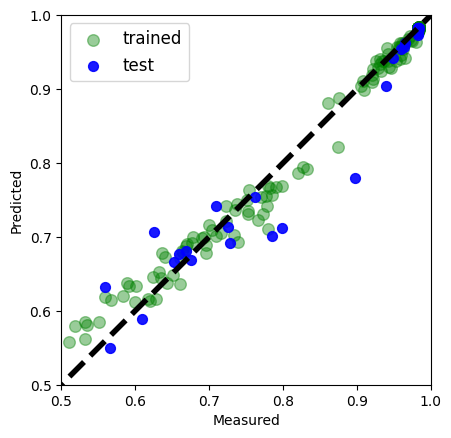

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
predicted = rf.predict(Xtest)
trained = rf.predict(Xtrain)
ax.scatter(ytrain,trained,c='green', s=70, alpha=0.4, label='trained')
ax.scatter(ytest, predicted,c='blue', s=50, alpha=0.9, label='test')

ax.plot([0, 1], [0, 1], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.legend(fontsize=12)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

plt.xlim([0.5, 1])
plt.ylim([0.5, 1])
plt.show()

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, predicted)))

Mean Absolute Error: 0.01636469708451771
Mean Squared Error: 0.0010137366751736413
Root Mean Squared Error: 0.03183923169885921


In [12]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(Xtrain, ytrain)
feat_importances_2 = pd.Series(perm.feature_importances_, index=Xtrain.columns)



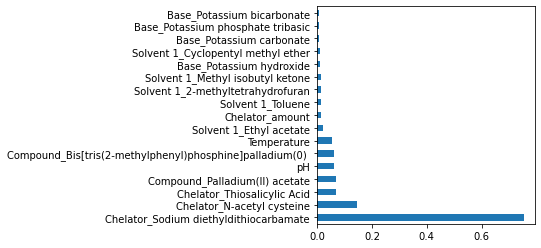

In [11]:
plt = feat_importances_2.nlargest(20).plot(kind='barh')
plt.set_aspect(1.0/plt.get_data_ratio(), adjustable='box')

In [18]:
Xtrain

,Compound_Bis[tris(2-methylphenyl)phosphine]palladium(0),Compound_Palladium(II) acetate,Solvent 1_2-methyltetrahydrofuran,Solvent 1_Cyclopentyl methyl ether,Solvent 1_Ethyl acetate,Solvent 1_Methyl isobutyl ketone,Solvent 1_Toluene,Base_Potassium bicarbonate,Base_Potassium carbonate,Base_Potassium hydroxide,Base_Potassium phosphate tribasic,Chelator_N-acetyl cysteine,Chelator_Sodium diethyldithiocarbamate,Chelator_Thiosalicylic Acid,Temperature,pH,Chelator_amount
194,0,1,0,0,0,1,0,0,1,0,0,0,0,1,40,9.95,10
101,0,1,1,0,0,0,0,1,0,0,0,0,1,0,20,11.56,10
68,0,1,0,0,1,0,0,0,0,0,1,0,0,1,20,8.92,10
224,0,1,0,0,0,0,1,0,0,0,1,0,1,0,40,11.87,10
37,0,1,0,1,0,0,0,1,0,0,0,1,0,0,20,10.71,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0,1,0,0,1,0,0,0,0,0,1,0,0,1,40,6.82,10
71,0,1,0,0,1,0,0,0,0,1,0,0,0,1,20,12.24,10
106,0,1,0,0,0,0,1,0,1,0,0,0,1,0,20,10.61,10
270,1,0,0,0,1,0,0,0,1,0,0,0,1,0,20,10.39,5


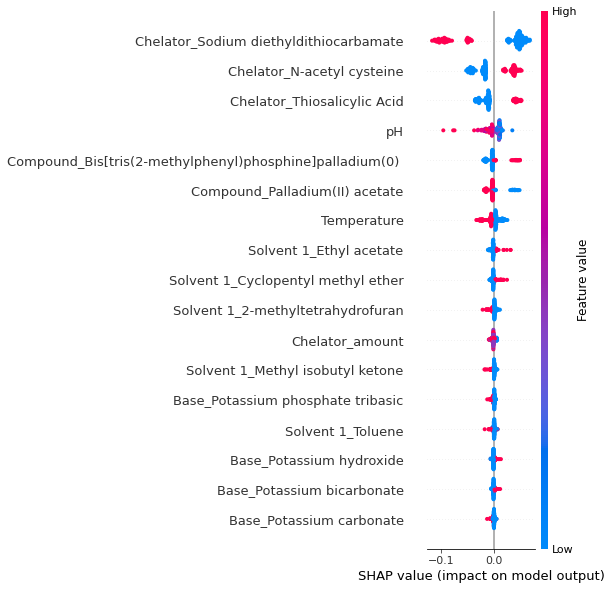

[[-2.98802450e-03 -2.73798894e-03  1.07848818e-03 ... -4.68090846e-03
   1.25031268e-02  1.89899507e-05]
 [-1.64149957e-02 -1.62789926e-02 -1.05133103e-02 ...  1.36736123e-02
  -9.85189198e-03 -2.89510789e-03]
 [-2.63859411e-03 -2.44704175e-03  1.65487735e-03 ...  2.11591126e-03
   1.18180318e-02 -8.29659114e-04]
 ...
 [-1.60638986e-02 -1.39932718e-02 -1.43684767e-03 ...  1.28410717e-02
  -8.36216259e-03  5.25258415e-03]
 [ 4.03649408e-02  3.51473273e-02  6.71462052e-04 ...  1.28027477e-02
   6.61658123e-04  1.26750420e-03]
 [-1.45156592e-02 -1.37674504e-02 -2.65530020e-04 ...  1.62310484e-02
   2.95207473e-03  2.37928943e-03]]


In [21]:
import shap 

explainer = shap.TreeExplainer(rf)
shap.initjs()
shap_values = explainer.shap_values(Xtrain)
shap.summary_plot(shap_values, features=Xtrain, feature_names=Xtrain.columns)

print(shap_values)
